# PyOD anomaly detectors
Here we will use anomaly detectors from the [PyOD](https://github.com/yzhao062/pyod) library to detect anomalies in the trend data. More specifically, we will use Iforest, KNN, LOF, OCSVM, ABOD and ECOD. 

In [1]:
from src.anomaly_detection import PYODAnomalyDetector, Windowing

i_forest = PYODAnomalyDetector('IForest', windowing=Windowing(100))
knn = PYODAnomalyDetector('KNN', windowing=Windowing(100))
lof = PYODAnomalyDetector('LOF', windowing=Windowing(100))
ocsvm = PYODAnomalyDetector('OCSVM', windowing=Windowing(100))
abod = PYODAnomalyDetector('ABOD', windowing=Windowing(100))
ecod = PYODAnomalyDetector('ECOD', windowing=Windowing(100))
anomaly_scores = {}

## Load the data

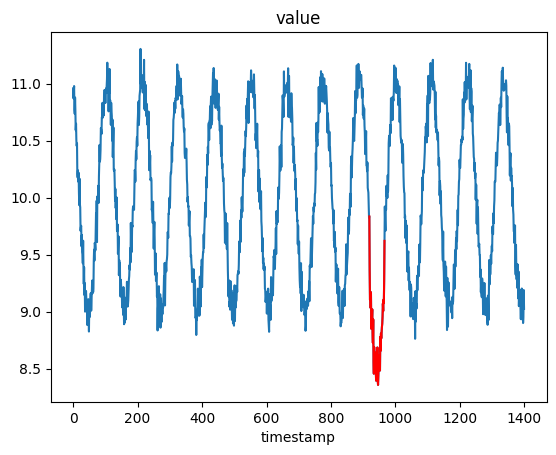

In [2]:
from src.data_management.DataManager import DataManager
from src.visualization import plot_data

data_manager = DataManager('../data')
data_manager.select({'collection_name': 'Demo'})
dataset_index = data_manager.get(0)
trend_data_df = data_manager.load(dataset_index)
trend_data, ground_truth = data_manager.load_raw_data(dataset_index)

plot_data(trend_data_df, show_ground_truth='inline');

## IForest

In [3]:
i_forest.fit(trend_data)
decision_scores_i_forest = i_forest.decision_function(trend_data)
anomaly_scores['Anomaly scores of IForest'] = decision_scores_i_forest

## KNN

In [4]:
knn.fit(trend_data)
decision_scores_knn = knn.decision_function(trend_data)
anomaly_scores['Anomaly scores of KNN'] = decision_scores_knn

## LOF

In [5]:
lof.fit(trend_data)
decision_scores_lof = lof.decision_function(trend_data)
anomaly_scores['Anomaly scores of LOF'] = decision_scores_lof

## OCSVM

In [6]:
ocsvm.fit(trend_data)
decision_scores_ocsvm = ocsvm.decision_function(trend_data)
anomaly_scores['Anomaly scores of OCSVM'] = decision_scores_ocsvm

## ABOD

In [7]:
abod.fit(trend_data)
decision_scores_abod = abod.decision_function(trend_data)
anomaly_scores['Anomaly scores of ABOD'] = decision_scores_abod

## ECOD

In [8]:
ecod.fit(trend_data)
decision_scores_ecod = ecod.decision_function(trend_data)
anomaly_scores['Anomaly scores of ECOD'] = decision_scores_ecod

## Plot anomaly scores

Here we plot the anomaly scores of the different anomaly detectors. We see that all of them detected the single anomaly, except for Angle-based Anomaly Detection (ABOD). This method computes for each point the variance of the angle with every other pair of points. A low variance indicates an anomaly. However, the PyOD library accounted for this phenomena, and ensured that high scores indicate anomalies (by multiplying with '-1'). Nevertheless, the anomaly scores of ABOD seem to be the opposite. This might be due to the temporal dependencies of the time series data, which means that consecutive sliding windows are very close in space, and consequently the angles might be misguided.  

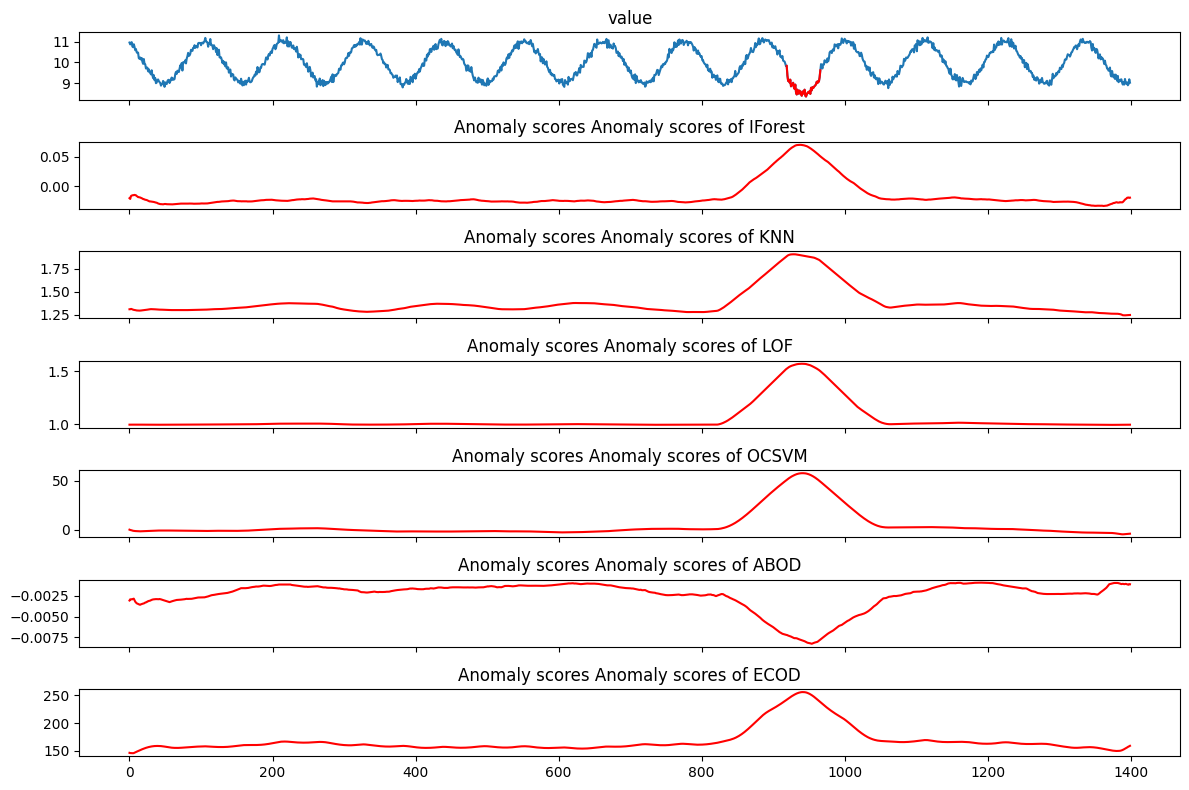

In [9]:
from src.visualization import plot_anomaly_scores

fig = plot_anomaly_scores(trend_data_df, anomaly_scores, show_ground_truth='inline')
fig.set_size_inches(12, 8)
fig.tight_layout()